In [2]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

In [3]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langgraph.graph import MessagesState
import requests
import json

In [4]:
# System message for context

# Function to extract C functions from C files via ChatGPT
def extract_functions(path: str, state: MessagesState):
    sys_msg = SystemMessage(content="You are a helpful assistant tasked with extracting C functions and their code from the provided C file.")
    # Fetch the file content from the provided link
    with open(path, 'r') as file:
        file_content = file.read()
    # Prepare the human message containing the file content
    human_msg = HumanMessage(content=f"Extract the different C functions from the following C file:\n\n{file_content}\n\nProvide a list of dictionaries where each dictionary contains the 'function_name' which is only the name of the function(remove any brackets or return parameters etc) and 'function_code'. Clean the response to not have anything other than the list of dictionaries in the output.")

    # Update the state with the human message
    state["messages"].append(human_msg)
    llm_for_extraction = ChatOpenAI(model="gpt-3.5-turbo-1106")
    # Invoke the LLM using the provided system message and the state
    extracted_functions = llm_for_extraction.invoke([sys_msg] + state["messages"])
    
    # Parse the AI response (assuming it returns the correct format directly)
    return extracted_functions

# Example usage
state = MessagesState(messages=[])
link_to_file = "data/simple-scenario/student_solution.c"  
# print(extract_functions(link_to_file, state).content.rstrip('```'.lstrip('```json')))
extracted_student_functions = json.loads(extract_functions(link_to_file, state).content.rstrip('```').lstrip('```json'))
link_to_file = "data/simple-scenario/model_solution.c"  # Replace with the actual link to the file file
extracted_model_functions = json.loads(extract_functions(link_to_file, state).content.rstrip('```').lstrip('```json'))
extracted_model_functions

[{'function_name': 'createNewRecord',
  'function_code': 'record* createNewRecord();'},
 {'function_name': 'createNewNode',
  'function_code': 'LLNode* createNewNode(int value);'},
 {'function_name': 'addNodeToRecord',
  'function_code': 'void addNodeToRecord(record* r, int value);'},
 {'function_name': 'new_bst', 'function_code': 'BST* new_bst();'},
 {'function_name': 'new_node',
  'function_code': 'Node* new_node(record* record);'},
 {'function_name': 'insert',
  'function_code': 'void insert(BST* bst, record* record);'},
 {'function_name': 'readData',
  'function_code': 'BST* readData(char* fileName);'},
 {'function_name': 'traverse_in_order',
  'function_code': 'void traverse_in_order(Node* node);'},
 {'function_name': 'mergeIn',
  'function_code': 'LLNode* mergeIn(LLNode* head, int st1, int st2, int en2);'},
 {'function_name': 'sortLists', 'function_code': 'void sortLists(BST* bst);'},
 {'function_name': 'traverse', 'function_code': 'void traverse(Node* node);'},
 {'function_name'

In [5]:
extracted_model_functions

[{'function_name': 'createNewRecord',
  'function_code': 'record* createNewRecord();'},
 {'function_name': 'createNewNode',
  'function_code': 'LLNode* createNewNode(int value);'},
 {'function_name': 'addNodeToRecord',
  'function_code': 'void addNodeToRecord(record* r, int value);'},
 {'function_name': 'new_bst', 'function_code': 'BST* new_bst();'},
 {'function_name': 'new_node',
  'function_code': 'Node* new_node(record* record);'},
 {'function_name': 'insert',
  'function_code': 'void insert(BST* bst, record* record);'},
 {'function_name': 'readData',
  'function_code': 'BST* readData(char* fileName);'},
 {'function_name': 'traverse_in_order',
  'function_code': 'void traverse_in_order(Node* node);'},
 {'function_name': 'mergeIn',
  'function_code': 'LLNode* mergeIn(LLNode* head, int st1, int st2, int en2);'},
 {'function_name': 'sortLists', 'function_code': 'void sortLists(BST* bst);'},
 {'function_name': 'traverse', 'function_code': 'void traverse(Node* node);'},
 {'function_name'

In [6]:
# System message for context


# Function to extract C functions from file content via ChatGPT
def extract_rubric(path: str, state: MessagesState):
    sys_msg = SystemMessage(content="You are a helpful assistant tasked with extracting rubric for each C function from the provided file content.")
    # Fetch the file content from the provided link
    with open(path, 'r') as file:
        file_content = file.read()
    
    # Prepare the human message containing the file content
    human_msg = HumanMessage(content=f"The following file contains rubric details for a C submission:\n\n{file_content}\n\nPlease extract the rubric details relevant to each of the mentioned functions.\n\nProvide a list of dictionaries where each dictionary contains the 'function_name' which is only the name of the function (remove any brackets or return parameters etc) and 'function_rubric'. Clean the response to not have anything other than the list of dictionaries in the output.")

    # Update the state with the human message
    state["messages"].append(human_msg)
    llm_for_rubric_extraction = ChatOpenAI(model="gpt-3.5-turbo-1106")
    # Invoke the LLM using the provided system message and the state
    extracted_rubric = llm_for_rubric_extraction.invoke([sys_msg] + state["messages"])
    
    # Parse the AI response (assuming it returns the correct format directly)
    return extracted_rubric

# Example usage
state = MessagesState(messages=[])
link_to_file = "data/simple-scenario/rubric.md"  # Replace with the mdual link to the file file
extracted_rubric = json.loads(extract_rubric(link_to_file, state).content.rstrip('```').lstrip('```json'))

extracted_rubric

[{'function_name': 'readData',
  'function_rubric': 'Accurately reads the input file file1.txt and retrieves the number of records and corresponding data (5 marks).'},
 {'function_name': 'readData',
  'function_rubric': 'Correctly constructs a Binary Search Tree (BST) where each node stores a linked list, using the first integer in each line as the key (5 marks).'},
 {'function_name': 'sortLists',
  'function_rubric': 'Implements a sorting algorithm of choice to sort each linked list starting from the second node without modifying the first node (5 marks).'},
 {'function_name': 'sortLists',
  'function_rubric': 'Correctly sorts all linked lists stored in the BST nodes as per specifications (5 marks).'},
 {'function_name': 'traverse',
  'function_rubric': 'Implements an in-order traversal of the BST to visit each node in the correct order (5 marks).'},
 {'function_name': 'traverse',
  'function_rubric': 'Traversal outputs each linked list to file2.txt, with one linked list per line as d

In [7]:

# Function to evaluate student code based on model code and rubric
def evaluate_student_code(student_code: str, model_code: str, rubric_content: str, state: MessagesState, function_name: str):
    sys_msg = SystemMessage(content="You are a helpful assistant tasked with evaluating a student's C code against a model solution based on a provided rubric. You will give numeric scores for each criterion and provide detailed comments, including correctness, errors, and suggestions for improvement.")

    # Prepare the human message containing the student code, model code, and rubric
    human_msg = HumanMessage(content=f"Here is a student's C code submission:\n\n{student_code}\n\nAnd here is the correct model solution:\n\n{model_code}\n\nUsing the following rubric:\n\n{rubric_content} for the function {function_name}\n\nEvaluate the student's submission, providing a numeric score for each criterion from the rubric. Along with the score, give detailed comments on the correctness, errors, and suggestions for improvement. Provide only one evaluation, which must abide by the marks breakdown given in the rubrik. Do not provide a total score.")

    # Update the state with the human message
    state["messages"].append(human_msg)
    llm_for_evaluation = ChatOpenAI(model="gpt-3.5-turbo-1106")
    # Invoke the LLM using the system message and the state
    evaluation_response = llm_for_evaluation.invoke([sys_msg] + state["messages"])
    
    # Parse the AI response (assuming it returns the correct format directly)
    return evaluation_response

def initial_evaluator(extracted_student_functions, extracted_model_functions, extracted_rubric):
    evaluations=[]
    for i in extracted_student_functions:
        rubric=''
        model=''
        for function_dict in extracted_model_functions:
            if function_dict.get('function_name') == i['function_name']:
                model=function_dict['function_code']
        for function_dict in extracted_rubric:
            if function_dict.get('function_name') == i['function_name']:
                rubric=function_dict['function_rubric']
        state = MessagesState(messages=[])
        evaluations.append(evaluate_student_code(i['function_code'], model, rubric, state, i['function_name']).content)
    return evaluations

evaluations=initial_evaluator(extracted_student_functions, extracted_model_functions, extracted_rubric)
evaluations

["Sure, I can help you with that. Let's evaluate the student's code against the provided rubric.\n\nRubric for the function createNewList:\n\n1. Correct memory allocation and initialization of the list struct (out of 3 points)\n2. Proper initialization of the count and head members (out of 3 points)\n3. Proper return of the newly created list (out of 2 points)\n4. Code style and formatting (out of 2 points)\n\nNow, let's evaluate the student's submission:\n\n1. Correct memory allocation and initialization of the list struct:\n   The student correctly allocates memory for the list struct using malloc. However, the student does not cast the malloc return value to the proper type (LIST). This can lead to potential issues and should be corrected.\n   Score: 2/3\n   Improvement: Cast the malloc return value to the proper type (LIST) to ensure type safety.\n\n2. Proper initialization of the count and head members:\n   The student correctly initializes the count to 0 and the head to NULL. Thi

In [8]:
def reevaluate_student_code(student_code: str, model_code: str, rubric_content: str, prior_evaluation: str, state: MessagesState, function_name: str):
    sys_msg = SystemMessage(content="You are a helpful assistant tasked with evaluating a student's C code against a model solution based on a provided rubric. You will give numeric scores for each criterion and provide detailed comments, including correctness, errors, and suggestions for improvement.")

    # Prepare the human message containing the student code, model code, and rubric
    human_msg = HumanMessage(content=f"Here is a student's C code submission:\n\n{student_code}\n\nAnd here is the correct model solution:\n\n{model_code}\n\nUsing the following rubric:\n\n{rubric_content}\n\nThe previous evaluation for the {function_name} function was:\n\n{prior_evaluation}\n\nEvaluate the student's submission, providing a numeric score for each criterion from the rubric. Along with the score, give detailed comments on the correctness, errors, and suggestions for improvement. Include the function name in the response.")

    # Update the state with the human message
    state["messages"].append(human_msg)
    llm_for_evaluation = ChatOpenAI(model="gpt-3.5-turbo-1106")
    # Invoke the LLM using the system message and the state
    evaluation_response = llm_for_evaluation.invoke([sys_msg] + state["messages"])
    
    # Parse the AI response (assuming it returns the correct format directly)
    return evaluation_response

def re_evaluator(extracted_student_functions, extracted_model_functions, extracted_rubric, evaluations=None):
    if evaluations is None:
        evaluations = []
    
    for x, i in enumerate(extracted_student_functions):
        rubric = ''
        model = ''
        for function_dict in extracted_model_functions:
            if function_dict.get('function_name') == i['function_name']:
                model = function_dict['function_code']
        for function_dict in extracted_rubric:
            if function_dict.get('function_name') == i['function_name']:
                rubric = function_dict['function_rubric']
        
        state = MessagesState(messages=[])
        evaluations.append(reevaluate_student_code(i['function_code'], model, rubric, evaluations, state, i['function_name']).content)
    
    return evaluations

# Usage:
reevaluations = re_evaluator(extracted_student_functions, extracted_model_functions, extracted_rubric)
reevaluations

['Function: createNewList\n\n1. Functionality:\nThe student\'s code correctly allocates memory for a new list and initializes the count and head pointers. The functionality seems correct. \nScore: 3\n\n2. Memory Management:\nThe student correctly allocates memory for the new list using malloc. However, it\'s essential to check if the malloc call returns a non-NULL pointer to ensure successful memory allocation.\nScore: 2\n\n3. Naming Conventions:\nThe variable name "myList" is clear and descriptive, following good naming conventions.\nScore: 3\n\nOverall, the student\'s code demonstrates a good understanding of creating a new list in C. However, adding a check for the return value of malloc and error handling would improve the robustness of the code. \n\nTotal Score: 8',
 'Based on the provided code and the given rubric, here is the evaluation for the student\'s NewLLNode function:\n\n1. Functionality:\nThe student\'s code correctly creates a new linked list node with the given value a

In [17]:
def extract_marks(evaluation):
    sys_msg = SystemMessage(content="You are a helpful assistant tasked with extracting stepwise makrs from the given evaluation.")

    # Prepare the human message containing the student code, model code, and rubric
    human_msg = HumanMessage(content=f"Here is a student's C code evaluation:\n\n{evaluation}. Extract the stepwise marks given, and return a comma separated list of all the marks given for this question. Ensure that marks which have already been counted are not counted again. The output should be in a format resembling: [1, 2, 3, ...]")

    # Update the state with the human message
    state["messages"].append(human_msg)
    llm_for_extraction = ChatOpenAI(model="gpt-3.5-turbo-1106")
    # Invoke the LLM using the system message and the state
    extraction_response = llm_for_extraction.invoke([sys_msg] + state["messages"])
    
    # Parse the AI response (assuming it returns the correct format directly)
    return extraction_response

def extract_marks_for_all_functions(evaluations):
    marks=[]
    for i in evaluations:
        print(extract_marks(i).content)
    return marks

list_of_marks=extract_marks_for_all_functions(reevaluations)

[3, 2, 3]
```json
[
    {"function_name": "Functionality", "function_rubric": 3},
    {"function_name": "Memory Management", "function_rubric": 2},
    {"function_name": "Naming Conventions", "function_rubric": 2}
]
```
```json
[
  {
    "function_name": "InsertAfter",
    "function_rubric": "2, N/A, 2"
  }
]
```
[2, 2]
[3, 2, 3]
[3, 2, 3]
The stepwise marks given for the creation function are as follows: [1, 1, 2]
The stepwise marks from the provided evaluations are as follows:

1. 3, 2, 3
2. 2, 2, 2
3. 1, 1, 2

The extracted stepwise marks in a comma-separated list are: [3, 2, 3, 2, 2, 2, 1, 1, 2]
The stepwise marks given for the provided evaluations are:

1, 2, 3
The stepwise marks for the given evaluations are as follows:

1. [3, 2, 3]
2. [3, 2, 2]
3. [1, 3, 2]

Please let me know if you need any further assistance.


In [12]:
extraction_response

NameError: name 'extraction_response' is not defined

In [ ]:
list_of_marks

[5,
 5,
 4,
 2,
 5,
 4,
 2,
 2,
 1,
 1,
 6,
 7,
 5,
 8,
 3,
 3,
 4,
 4,
 1,
 7,
 5,
 8,
 6,
 3,
 2,
 4,
 1,
 3,
 4,
 5,
 4,
 2,
 2,
 1,
 0,
 0,
 2,
 1,
 3,
 2,
 2,
 5,
 3,
 2,
 1]

In [ ]:
def sum_marks(list_of_marks) -> int:
    return sum(list_of_marks)

print(sum_marks(list_of_marks))

tools = [sum_marks]
llm = ChatOpenAI(model="gpt-3.5-turbo-1106")
llm_with_tools = llm.bind_tools(tools)

150


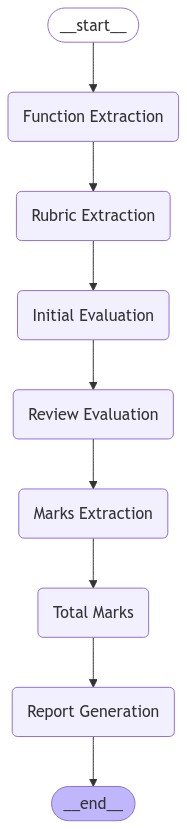

In [ ]:
#WILL NOT RUN

from langgraph.graph import StateGraph, MessagesState, START, END
from IPython.display import Image, display

# Graph
builder = StateGraph(MessagesState)

# Define nodes: these do the work
# builder.add_node("assistant", assistant)
# builder.add_node("tools", ToolNode(tools))


builder.add_node("Function Extraction", extract_functions )
builder.add_node("Rubric Extraction", extract_rubric)
builder.add_node("Initial Evaluation", initial_evaluator)
builder.add_node("Review Evaluation", re_evaluator)
builder.add_node("Marks Extraction", extract_marks_for_all_functions)
builder.add_node("Total Marks", sum_marks)
builder.add_node("Report Generation", sum_marks)

builder.add_edge(START, "Function Extraction")

builder.add_edge("Function Extraction", "Rubric Extraction")

builder.add_edge("Rubric Extraction", "Initial Evaluation")

builder.add_edge("Initial Evaluation", "Review Evaluation")

builder.add_edge("Review Evaluation", "Marks Extraction")

builder.add_edge("Marks Extraction", "Total Marks")

builder.add_edge("Total Marks", "Report Generation")

builder.add_edge("Report Generation", END)

# Define edges: these determine how the control flow moves
# builder.add_edge(START, "assistant")
# builder.add_conditional_edges(
#     "assistant",
#     # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
#     # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
#     tools_condition,
# )
# builder.add_edge("tools", "assistant")
react_graph = builder.compile()

# Show
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
#i did not have enough time to put it all in a chain, but the flow of the graph is a straight chain 
#from the start to the end with the functions/agents called in the order above

In [ ]:
Link to the chat:

https://chatgpt.com/share/67065bd2-6234-800b-bc71-842393404dc9

SyntaxError: invalid decimal literal (3199696890.py, line 3)